# User overview Analysis

Data Cleaning makes the data ready for modelling and analysis.

In [8]:
# packages for path locations
import os
import sys

In [9]:
# package scripts in the script module folder 
sys.path.insert(0,'../scripts/')

In [10]:
#importing the some libraries for the project
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Reading the data excel sheet
df=pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [10]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


# Top 10 handsets used by the customers.

In [11]:
handsetType = df['Handset Type'].value_counts()[:10]
handsetType

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [12]:
topHandsetType = df.groupby(['Handset Type']).agg({'Handset Type': ['count']})
topHandsetType.columns = ['count']
topHandsetType = topHandsetType.reset_index()
topHandsetType.head()

,Handset Type,count
0,A-Link Telecom I. Cubot A5,1
1,A-Link Telecom I. Cubot Note Plus,1
2,A-Link Telecom I. Cubot Note S,1
3,A-Link Telecom I. Cubot Nova,1
4,A-Link Telecom I. Cubot Power,1


In [13]:
topHandsetType = topHandsetType.nlargest(10, 'count')
topHandsetType = topHandsetType.reset_index(drop=True)
print('############################################')
print('Top 10 handsets used by customers')
print('############################################')
topHandsetType

############################################
Top 10 handsets used by customers
############################################


,Handset Type,count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9419
2,Apple iPhone 6 (A1586),9023
3,undefined,8987
4,Apple iPhone 7 (A1778),6326
5,Apple iPhone Se (A1723),5187
6,Apple iPhone 8 (A1905),4993
7,Apple iPhone Xr (A2105),4568
8,Samsung Galaxy S8 (Sm-G950F),4520
9,Apple iPhone X (A1901),3813


<AxesSubplot:xlabel='Handset Type'>

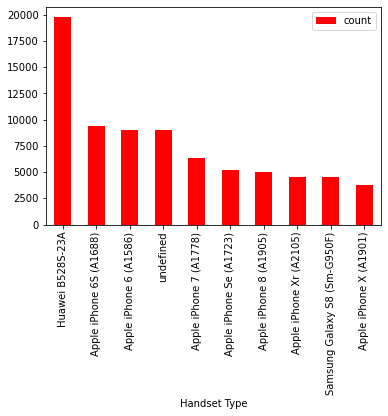

In [14]:
topHandsetType.plot.bar(x='Handset Type' ,stacked=True, color='red')

In [15]:
topHandsetComp = df['Handset Manufacturer'].value_counts()[:3]
topHandsetComp

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [16]:
topHandsetManu = df.groupby(['Handset Manufacturer']).agg({'Handset Manufacturer': ['count']})
topHandsetManu.columns = ['count']
topHandsetManu = topHandsetManu.reset_index()
topHandsetManu.head()

,Handset Manufacturer,count
0,A-Link Telecom International Co Limited,8
1,ASUSTeK,23
2,Acer,14
3,Adar,1
4,Alif Communications,1


In [17]:
topHandsetManu = topHandsetManu.nlargest(3, 'count')
topHandsetManu = topHandsetManu.reset_index(drop=True)
print('############################################')
print('Top 3 handsets Manufacturer')
print('############################################')
topHandsetManu

############################################
Top 3 handsets Manufacturer
############################################


,Handset Manufacturer,count
0,Apple,59565
1,Samsung,40839
2,Huawei,34423


<AxesSubplot:xlabel='Handset Manufacturer'>

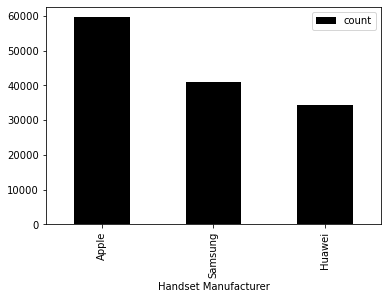

In [18]:
topHandsetManu.plot.bar(x='Handset Manufacturer' , stacked=True, color='black')

## Top 5 handsets per top 3 handset manufacturer

In [19]:
appleTop = df.loc[df['Handset Manufacturer'] == 'Apple']
appleTop = appleTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
appleTop.columns = ['count']
appleTop=appleTop.nlargest(5, 'count')
appleTop

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9419
                     Apple iPhone 6 (A1586)    9023
                     Apple iPhone 7 (A1778)    6326
                     Apple iPhone Se (A1723)   5187
                     Apple iPhone 8 (A1905)    4993

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

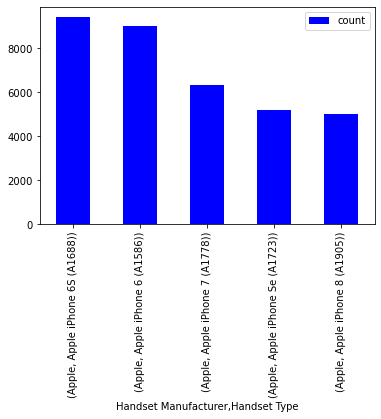

In [20]:
appleTop.plot.bar(y='count', stacked=True, color='blue')

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

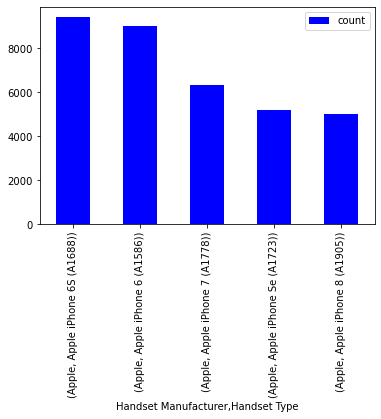

In [21]:
appleTop.plot.bar(y='count', stacked=True, color='blue')

In [23]:
samTop = df.loc[df['Handset Manufacturer'] == 'Samsung']
samTop = samTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
samTop.columns = ['count']
samTop=samTop.nlargest(5, 'count')
samTop

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4520
                     Samsung Galaxy A5 Sm-A520F     3724
                     Samsung Galaxy J5 (Sm-J530)    3696
                     Samsung Galaxy J3 (Sm-J330)    3484
                     Samsung Galaxy S7 (Sm-G930X)   3199

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

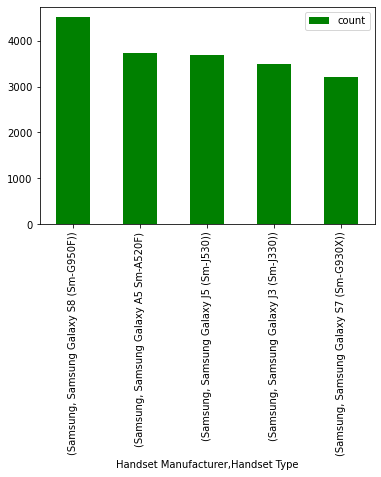

In [24]:
samTop.plot.bar(y='count', stacked=True, color='green')

In [25]:
huwTop = df.loc[df['Handset Manufacturer'] == 'Huawei']
huwTop = huwTop.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
huwTop.columns = ['count']
huwTop=huwTop.nlargest(5, 'count')
huwTop

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19752
                     Huawei E5180                     2079
                     Huawei P20 Lite Huawei Nova 3E   2021
                     Huawei P20                       1480
                     Huawei Y6 2018                    997

<AxesSubplot:xlabel='Handset Manufacturer,Handset Type'>

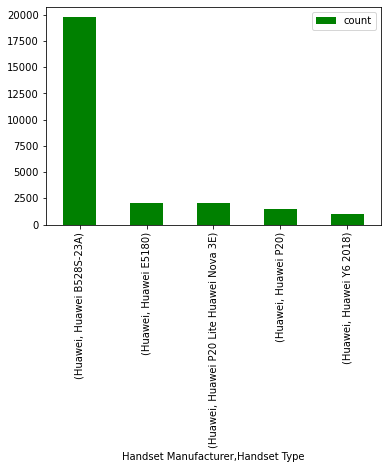

In [26]:
huwTop.plot.bar(y='count', stacked=True, color='green')

In [29]:
top5 = df.loc[:,['Handset Type','Handset Manufacturer']]
value = top5.groupby(['Handset Manufacturer', 'Handset Type']).size()
topList = pd.Series(dtype='object')
for i in topHandsetComp.index:
    topList = topList.append(value[i])
top5List = topList.sort_values(ascending=False)[:5]

In [30]:
top5List

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
dtype: int64

<AxesSubplot:>

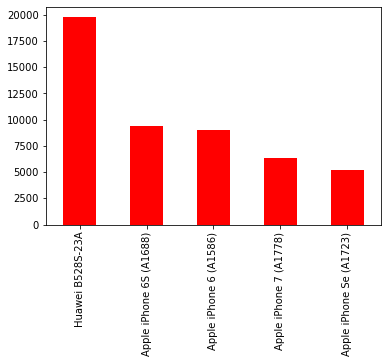

In [31]:
top5List.plot.bar(y='count', stacked=True, color='red')

Apple, Samsung, and Huawei phones are among the most popular on the network, accounting for 134,827 users. Hwawei B528S-23A is the most popular phone, accounting for 19752 units. Apple iPhone 6S, 6, 7, and Se are the next 4 big popular phones after Huawei. Users prefer the Huawei B528S-23A, so we know that selling more and similar Huawei phones, running promotions on their similar product will account for success in future busenesses. This also will apply to the four models of Apple

# Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.

Aggregate per user the following information in the column number of xDR sessions
Session duration
the total download (DL) and upload (UL) data
the total data volume (in Bytes) during this session for each application

# Data Information

In [4]:
import os, sys
import pandas as pd
import numpy as np
# package scripts in the script module folder 
sys.path.append(os.path.abspath(os.path.join('../../scripts')))
from data_preprocessing import data_preProcessing_script 

In [12]:
# object of the script class
preProcess = data_preProcessing_script(df)

In [13]:
preProcess.show_datatypes()

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [14]:
#getting the summary of our dataframe, the null values
preProcess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [15]:
preProcess.show_correlation()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,1.000000,0.002961,-0.001219,0.007515,0.000152,-0.003307,0.164054,-0.022561,0.034924,0.063973,...,-0.002466,-0.000703,-0.000622,-0.003725,0.000487,-0.003212,0.000943,-0.002240,-0.004577,0.000400
Start ms,0.002961,1.000000,0.120945,0.001287,-0.000054,-0.001021,-0.001133,0.004141,-0.002221,-0.000690,...,-0.001582,0.001238,-0.002593,-0.002334,-0.004229,-0.002512,-0.003687,0.003803,-0.000028,-0.004299
End ms,-0.001219,0.120945,1.000000,-0.001302,0.000328,-0.001890,-0.000032,-0.005287,-0.002607,0.000694,...,-0.003741,-0.003450,0.004132,-0.001156,-0.004687,0.000988,0.002758,0.002786,-0.000574,-0.004687
Dur. (ms),0.007515,0.001287,-0.001302,1.000000,-0.019798,0.024616,-0.058043,-0.052472,-0.002981,-0.165355,...,0.003853,0.002211,-0.001834,-0.005517,0.000691,0.001841,-0.000404,0.001101,-0.001019,0.000768
IMSI,0.000152,-0.000054,0.000328,-0.019798,1.000000,-0.662558,-0.000536,-0.000365,-0.000437,-0.000557,...,0.000967,0.002578,-0.003829,0.001217,0.005149,-0.001209,0.000802,-0.001011,0.000744,0.005030
MSISDN/Number,-0.003307,-0.001021,-0.001890,0.024616,-0.662558,1.000000,0.005703,-0.001701,0.008404,-0.001857,...,0.003344,0.005482,0.003370,0.000012,-0.003618,0.003510,-0.001369,0.001324,0.005421,-0.003415
IMEI,0.164054,-0.001133,-0.000032,-0.058043,-0.000536,0.005703,1.000000,-0.003732,0.134446,0.301312,...,0.001277,-0.000728,-0.001591,-0.004559,0.001828,0.003727,0.004183,0.000655,-0.000463,0.001774
Avg RTT DL (ms),-0.022561,0.004141,-0.005287,-0.052472,-0.000365,-0.001701,-0.003732,1.000000,0.007867,-0.022698,...,-0.000714,0.004143,-0.000945,-0.006344,-0.003032,-0.009139,-0.000716,0.002466,-0.003537,-0.003070
Avg RTT UL (ms),0.034924,-0.002221,-0.002607,-0.002981,-0.000437,0.008404,0.134446,0.007867,1.000000,0.053914,...,-0.001698,0.001591,-0.000419,0.000513,0.002664,0.002435,0.000094,-0.001099,0.002009,0.002600
Avg Bearer TP DL (kbps),0.063973,-0.000690,0.000694,-0.165355,-0.000557,-0.001857,0.301312,-0.022698,0.053914,1.000000,...,0.002418,-0.003160,0.005355,0.003569,-0.001315,0.001864,0.006849,0.001652,0.001712,-0.001165


# Data Cleaning and Manipulation

In [16]:
# droping duplicate rows
preProcess.drop_duplicates()

In [20]:
#changing bytes to megabytes
preProcess.convertByteMB(['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'])

Byte to MB change error


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+13,2.501332e+12,8.198936e+12,9.656251e+12,2.780823e+14,1.434415e+13,1.717444e+14,8.814393e+12,3.674974e+13,3.088796e+14
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+13,1.911173e+13,1.833841e+13,1.722713e+13,6.087501e+14,1.170709e+12,5.269042e+14,1.505514e+13,5.380039e+13,6.533850e+14
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+13,1.469958e+13,1.758779e+13,6.163408e+12,2.295846e+14,3.956300e+11,4.106926e+14,4.215763e+12,2.788364e+13,2.798073e+14
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+13,1.514664e+13,1.399465e+13,1.097942e+12,7.995382e+14,1.084972e+13,7.490399e+14,1.279728e+13,4.332422e+13,8.460285e+14
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+13,1.896287e+13,1.712458e+13,4.152180e+11,5.277072e+14,3.529801e+12,5.507095e+14,1.391032e+13,3.854281e+13,5.691386e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+13,1.176343e+13,1.788370e+13,1.967816e+13,5.266097e+14,9.197207e+12,3.264510e+12,1.348742e+13,5.762885e+13,5.741753e+14
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+13,8.288284e+12,1.935015e+13,2.129315e+13,6.268931e+14,4.735033e+12,7.121804e+14,2.457758e+12,3.913508e+13,6.666488e+14
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+13,1.855903e+12,9.963942e+12,5.065760e+12,5.535395e+14,1.339432e+13,1.211009e+14,1.131473e+13,3.491222e+13,5.927864e+14
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+12,8.305402e+12,3.322253e+12,1.317259e+13,3.525370e+14,2.529475e+12,8.147131e+14,1.406930e+12,2.962610e+13,3.718959e+14


In [21]:
preProcess.colums_WithMissingValue()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Total

In [22]:
preProcess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Bearer Id,991,0.66 %
Start,1,0.0 %
Start ms,1,0.0 %
End,1,0.0 %
End ms,1,0.0 %
Dur. (ms),1,0.0 %
IMSI,570,0.38 %
MSISDN/Number,1066,0.71 %
IMEI,572,0.38 %
Last Location Name,1153,0.77 %


# Droping colums that are >30% missing values

Filling missing values

In [23]:
data = df.ffill().bfill()

In [24]:
dataVal = data_preProcessing_script(data)

In [25]:
dataVal.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Bearer Id,0,0.0 %
Start,0,0.0 %
Start ms,0,0.0 %
End,0,0.0 %
End ms,0,0.0 %
Dur. (ms),0,0.0 %
IMSI,0,0.0 %
MSISDN/Number,0,0.0 %
IMEI,0,0.0 %
Last Location Name,0,0.0 %


In [26]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+13,2.501332e+12,8.198936e+12,9.656251e+12,2.780823e+14,1.434415e+13,1.717444e+14,8.814393e+12,3.674974e+13,3.088796e+14
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+13,1.911173e+13,1.833841e+13,1.722713e+13,6.087501e+14,1.170709e+12,5.269042e+14,1.505514e+13,5.380039e+13,6.533850e+14
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+13,1.469958e+13,1.758779e+13,6.163408e+12,2.295846e+14,3.956300e+11,4.106926e+14,4.215763e+12,2.788364e+13,2.798073e+14
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+13,1.514664e+13,1.399465e+13,1.097942e+12,7.995382e+14,1.084972e+13,7.490399e+14,1.279728e+13,4.332422e+13,8.460285e+14
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+13,1.896287e+13,1.712458e+13,4.152180e+11,5.277072e+14,3.529801e+12,5.507095e+14,1.391032e+13,3.854281e+13,5.691386e+14


# Arrangeing the new df in xDR session

In [27]:
#getting the number od xDR sessions
df_new = (data.groupby(['MSISDN/Number'])['Bearer Id'].agg([('no.of xDR sessions','count')]).reset_index())

In [28]:
df_new.head()

,MSISDN/Number,no.of xDR sessions
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [29]:
# Aggregation of Total values
df_new["Total Uploads"]=data["Google UL (MegaBytes)"]+data["Email UL (MegaBytes)"]+data["Social Media UL (MegaBytes)"]+data["Youtube UL (MegaBytes)"]+data["Netflix UL (MegaBytes)"]+data["Gaming UL (MegaBytes)"]+data["Other UL (MegaBytes)"]
df_new["Total Downloads"]=data["Google DL (MegaBytes)"]+data["Email DL (MegaBytes)"]+data["Social Media DL (MegaBytes)"]+data["Youtube DL (MegaBytes)"]+data["Netflix DL (MegaBytes)"]+data["Gaming DL (MegaBytes)"]+data["Other DL (MegaBytes)"]
df_new['Total UL and DL']=df_new['Total Downloads']+df_new["Total Uploads"]

In [30]:
# Aggregation of Total Social Media data
df_new["Youtube_Total_Data"]=data["Youtube DL (MegaBytes)"]+data["Youtube UL (MegaBytes)"]
df_new["Google_Total_Data"]=data["Google DL (MegaBytes)"]+data["Google UL (MegaBytes)"]
df_new["Email_Total_Data"]=data["Email DL (MegaBytes)"]+data["Email UL (MegaBytes)"]
df_new["Social_Media_Total_Data"]=data["Social Media DL (MegaBytes)"]+data["Social Media UL (MegaBytes)"]
df_new["Netflix_Total_Data"]=data["Netflix DL (MegaBytes)"]+data["Netflix UL (MegaBytes)"]
df_new["Gaming_Total_Data"]=data["Gaming DL (MegaBytes)"]+data["Gaming UL (MegaBytes)"]
df_new["Other_Total_Data"]=data["Other DL (MegaBytes)"]+data["Other UL (MegaBytes)"]

In [31]:
# Time aggregates
df_new['Start ms']=data['Start ms']
df_new['End ms']=data['End ms']
df_new['Start']=data['Start']
df_new['End']=data['End']
df_new['Avg Delay (ms)']=data['Avg RTT UL (ms)']+data['Avg RTT DL (ms)']
df_new['Dur. (ms)']=data['Dur. (ms)']
df_new['Dur. (ms).1']=data['Dur. (ms).1']
df_new["Activity_Duration(ms)"]=data['Activity Duration UL (ms)']+data['Activity Duration DL (ms)']

In [32]:
# total speed kbps
df_new['Avg Throughput (kbps)']=data['Avg Bearer TP UL (kbps)']+data['Avg Bearer TP DL (kbps)']

In [33]:
# categorical Variables
df_new['Handset Manufacturer']=data['Handset Manufacturer']
df_new['Handset Type']=data['Handset Type']
df_new['Last Location Name']=data['Last Location Name']
df_new['IMSI']=data['IMSI']
df_new['IMEI']=data['IMEI']

In [34]:
df_new.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,...,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,3.360100e+10,1,3.674974e+13,4.806241e+14,5.173738e+14,1.835594e+13,2.905912e+12,3.701304e+12,1.570185e+12,1.785519e+13,...,47.0,1823652.0,1.823653e+09,76411.0,67.0,Samsung,Samsung Galaxy A5 Sm-A520F,9.16456699548519E+015,2.082014e+14,3.552121e+13
1,3.360100e+10,1,5.380039e+13,1.180289e+15,1.234090e+15,3.935912e+13,4.414096e+12,9.373850e+11,1.933278e+12,3.556554e+13,...,70.0,1365104.0,1.365104e+09,3728.0,42.0,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,2.082019e+14,3.579401e+13
2,3.360100e+10,1,2.788364e+13,6.904999e+14,7.183836e+14,3.442524e+13,1.022912e+13,3.363124e+12,1.726277e+12,2.375120e+13,...,70.0,1361762.0,1.361763e+09,0.0,15.0,Samsung,Samsung Galaxy A8 (2018),D42335A,2.082003e+14,3.528151e+13
3,3.360101e+10,1,4.332422e+13,1.595068e+15,1.638393e+15,3.653476e+13,1.181176e+13,2.070983e+12,6.574930e+11,1.509259e+13,...,70.0,1321509.0,1.321510e+09,41212.0,88.0,undefined,undefined,T21824A,2.082014e+14,3.535661e+13
4,3.360101e+10,2,3.854281e+13,1.119848e+15,1.158391e+15,3.422225e+13,7.748843e+12,2.110349e+12,9.127880e+11,1.753980e+13,...,70.0,1089009.0,1.089009e+09,0.0,15.0,Samsung,Samsung Sm-G390F,D88865A,2.082014e+14,3.540701e+13


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106856 entries, 0 to 106855
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            106856 non-null  float64
 1   no.of xDR sessions       106856 non-null  int64  
 2   Total Uploads            106856 non-null  float64
 3   Total Downloads          106856 non-null  float64
 4   Total UL and DL          106856 non-null  float64
 5   Youtube_Total_Data       106856 non-null  float64
 6   Google_Total_Data        106856 non-null  float64
 7   Email_Total_Data         106856 non-null  float64
 8   Social_Media_Total_Data  106856 non-null  float64
 9   Netflix_Total_Data       106856 non-null  float64
 10  Gaming_Total_Data        106856 non-null  float64
 11  Other_Total_Data         106856 non-null  float64
 12  Start ms                 106856 non-null  float64
 13  End ms                   106856 non-null  float64
 14  Star

# Produce clean data

In [36]:
print("""
# #######################################################
# produce clean data
# ########################################################
""")
df_new.to_csv('../data/cleaned_telecom_data.csv', index=False)
print('clean data successfully saved!!')


# #######################################################
# produce clean data
# ########################################################

clean data successfully saved!!


cleaned data saved successfully